Please note that the following tutorial was taken from https://github.com/jakevdp/PythonDataScienceHandbook

(200L, 2L)


(-2.7407706082556311,
 2.5817738419636962,
 -0.9503241913662932,
 1.022119864077601)

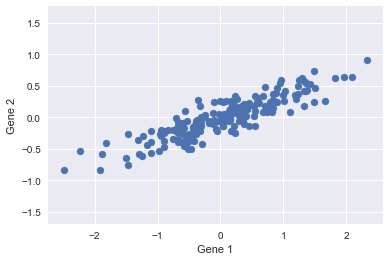

In [133]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
print(X.shape)
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Gene 1')
plt.ylabel('Gene 2')
plt.axis('equal')

In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [104]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [105]:
print(pca.explained_variance_)

[ 0.7625315  0.0184779]


(-2.7407706082556311,
 2.5817738419636962,
 -0.9503241913662932,
 1.022119864077601)

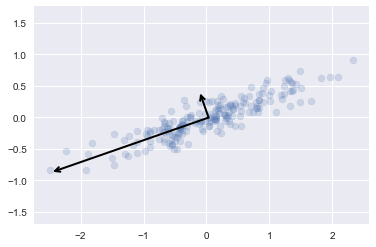

In [106]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                     linewidth=2,
                     shrinkA=0, shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)

# plot data
plt.scatter(X[:,0],X[:,1],alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

In [107]:
# PCA as dimensionality reduction
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape: ", X.shape)
print("transformed shape: ", X_pca.shape)
# data has been reduced to a single dimension

('original shape: ', (200L, 2L))
('transformed shape: ', (200L, 1L))


(-2.78030489102931, 2.670533706929767, -1.0014180896959415, 1.0245529068552033)

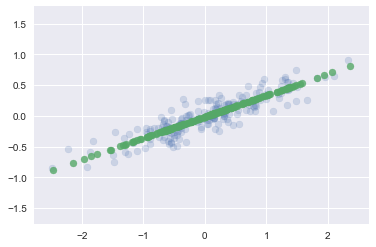

In [108]:
# Understand the effect of dimensionality reudction, we can perform the inverse transform
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8)
plt.axis('equal')

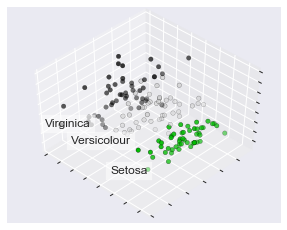

('original shape: ', (150L, 4L))
('transformed shape: ', (150L, 3L))


In [112]:
# 3 dimensions
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_pca[y == label, 0].mean(),
              X_pca[y == label, 1].mean() + 1.5,
              X_pca[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

print("original shape: ", X.shape)
print("transformed shape: ", X_pca.shape)
# data has been reduced from 4 dimensions to 3 dimensions

(1797L, 64L)


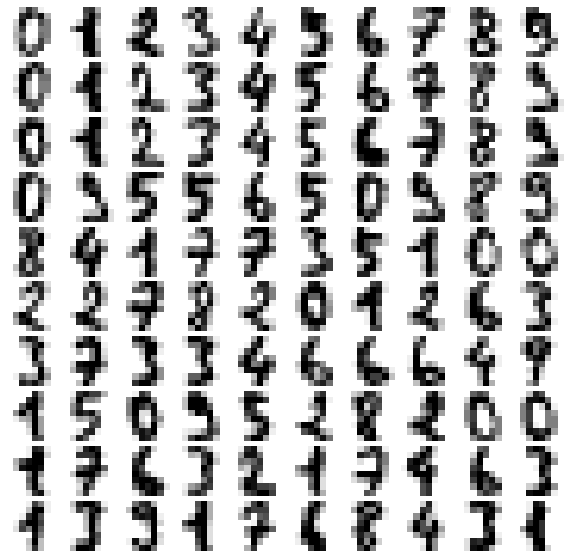

In [130]:
# Digits
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits dataset
digits = datasets.load_digits()
print(digits.data.shape)

def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10,10),
                            subplot_kw={'xticks':[],'yticks':[]},
                            gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary', interpolation='nearest',
                 clim=(0,16))
plot_digits(digits.data)

(1797L, 64L)
('original shape: ', (1797L, 64L))
('transformed shape: ', (1797L, 2L))


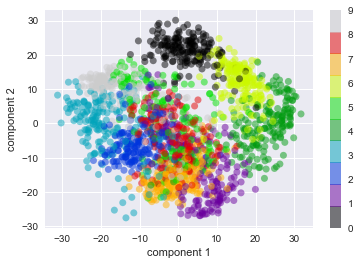

In [119]:
# High dimensional data
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape) # 64 dimensions (8x8 pixel images)
pca = PCA(n_components=2)
projected = pca.fit_transform(digits.data)
print("original shape: ", digits.data.shape)
print("transformed shape: ", projected.shape)

plt.scatter(projected[:,0],projected[:,1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

What do the reduced dimensions (component 1 and component 2) mean?
This meaning can be understood in terms of combinations of basis vectors.
For example, each image in the training set is defined by a collection of 64 pixel values, which we will call vector x:
x = [x1, x2, x3, ..., x64]

One way we can think about this is in terms of a pixel basis. That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:
image(x) = x1*(pixel 1) + x2*(pixel 2) + x3*(pixel 3) + ... + x64*(pixel 64)

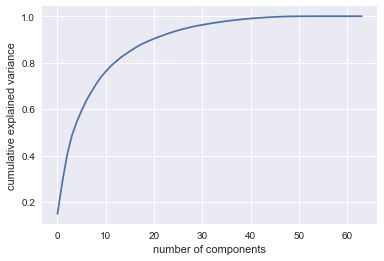

In [132]:
# Choosing the number of components
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
"""
We see in the graph below that the first 10 components 
contain approximately 75% of the variance, while you need 
around 50 components to describe close to 100% of the variance
"""